# Classification Data Set

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Libraries and Loading Data](#section2)
3. [Numerical Analysis](#section3)
4. [Data Visulation](#section4)<br>
    - 4.1 [Age vs Outcome](#section401)<br>
    - 4.2 [Age Analysis](#section402)<br>
    - 4.3 [Male and Female Ratio](#section403)<br>
    - 4.4 [fever vs Outcome](#section404)<br>
    - 4.5 [Cough vs Outcome](#section405)<br>
    - 4.6 [Fatigue vs Outcome](#section406)<br>
    - 4.7 [Blood Pressure vs Outcome](#section407)<br>
    - 4.8 [Cholestrol Level vs Outcome](#section407)<br>
5. [Encoding Categorical Data](#section5)<br>
    - 5.1 [Label Encoding](#section501)<br>
    - 5.2 [Feature Engineering](#section502)<br>
    - 5.3 [Pair Plot](#section503)<br>
    - 5.4 [Gender vs Outcome](#section504)<br>
    - 5.5 [Corealtion Heatmap](#section505)<br>
6. [Classification Model](#section6)<br>
    - 6.1 [Preparing X and y using pandas](#section601)<br>
    - 6.2 [Splitting X and y into training and test datasets.](#section602)<br>
7. [Logistic regression in scikit-learn](#section7)<br>
    - 7.1 [Using the Model for Prediction](#section701)<br>
    - 7.2 [Model Evaluation using accuracy classification score](#section702)<br>
    - 7.3 [Model Evaluation using confusion matrix](#section703)<br>
8. [Decision Tree](#section8)<br>
    - 8.1 [Using the Model for Prediction](#section801)<br>
    - 8.2 [Model Evaluation using Accuracy classification score](#section802)<br>
    - 8.3 [Model Evaluation using confusion matrix](#section803)<br> 
    - 8.4 [Decision Tree using GridSearchCV](#section804)<br>
    - 8.5 [Model Evaluation using Accuracy classification score](#section805)<br>
    - 8.6 [Model Evaluation using confusion matrix](#section806)<br>
9. [Random Forest](#section9)<br>
    - 9.1 [Using the Model for Prediction](#section901)<br>
    - 9.2 [Model Evaluation using Accuracy classification score](#section902)<br>
    - 9.3 [Model Evaluation using confusion matrix](#section903)<br> 
    - 9.4 [ROC AUC Curve](#section904)<br>
    - 9.5 [Decision Tree using GridSearchCV](#section905)<br>
    - 9.6 [Model Evaluation using Accuracy classification score](#section906)<br>
    - 9.7 [Model Evaluation using confusion matrix](#section907)<br> 
10. [Conclusion](#section10)<br>
    

# 1. Problem Statement

The main aim is to find the __Disease repot (Positive or Negative )__ depending on the __patients symptom__ from Disease_symptom_and_patient_profile_dataset

# 2. Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

# 3. Numerical Analysis

In [3]:
# How does our data look like ?
df.sample(5)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
116,Diabetes,Yes,No,No,No,40,Female,High,High,Negative
42,Colorectal Cancer,No,No,Yes,No,30,Female,Normal,High,Positive
15,Gastroenteritis,No,Yes,No,No,29,Female,Normal,Normal,Negative
229,Eczema,No,Yes,No,No,50,Female,High,High,Positive
161,Autism Spectrum Disorder (ASD),No,No,Yes,No,45,Male,Normal,Normal,Negative


In [4]:
# Checking Data Types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
#checking for null values
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [6]:
# What is the size of dataset
df.shape

(349, 10)

In [7]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [8]:
#let's check for number of unique values
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

# 4. Data Visulation

### 4.1 Age vs Outcome

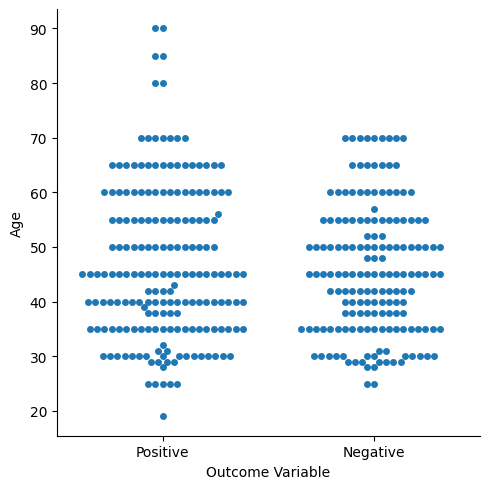

In [32]:
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = df , kind = "swarm")    

### People in old ages have a higher probability of being tested positive for diseases which is an outlier for our dataset

### 4.2 Age Analysis

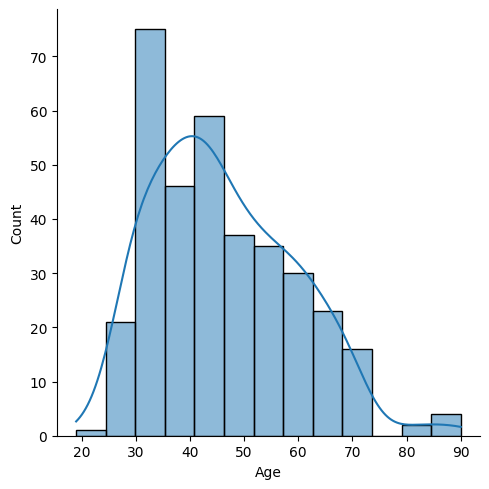

In [11]:
sns.displot(df['Age'] , kde=True)

### There is no major skewness in the dataset with a few outliers

### 4.3 Male and Female Ratio

<AxesSubplot:ylabel='None'>

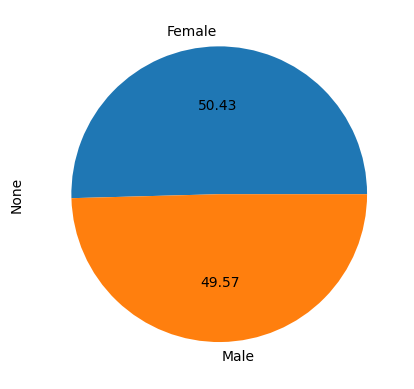

In [12]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

### The dataset is quite evenly distributed based on gender

### 4.4 fever vs Outcome

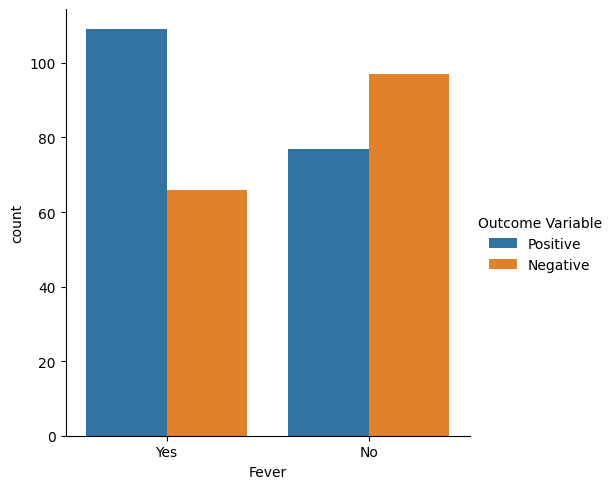

In [13]:
sns.catplot(x='Fever' , kind='count',data=df , hue = "Outcome Variable")

### Having Fever is a major indication of a positive diagnosis

### 4.5 Cough vs Outcome

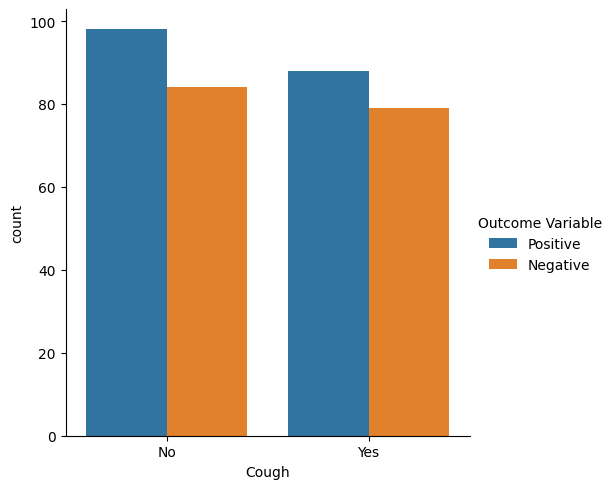

In [14]:
sns.catplot(x='Cough' , kind='count',data=df , hue = "Outcome Variable")

### Nothing major can be inferred from cough as it is quite common

### 4.6 Fatigue vs Outcome


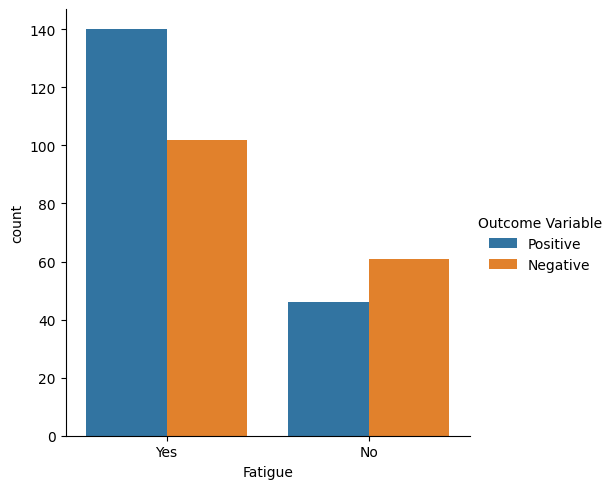

In [15]:
sns.catplot(x='Fatigue' , kind='count',data=df , hue = "Outcome Variable")

### A lot of people irrespective of positive or negative experience a lot of fatique

### 4.7 Blood Pressure vs Outcome

<AxesSubplot:ylabel='None'>

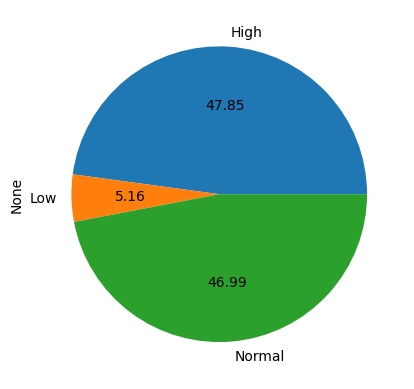

In [16]:
df.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')

### Majority of the subjects have a normal or high blood pressure

### 4.8 Cholesterol Level vs Outcome

<AxesSubplot:ylabel='None'>

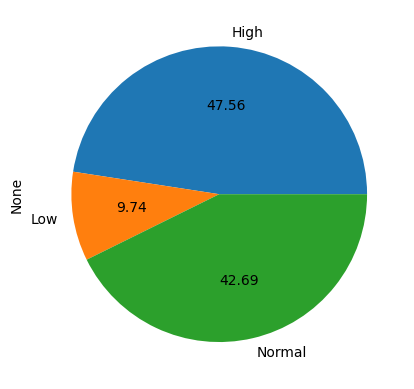

In [17]:
df.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')

### Majority of the people have high cholestrol and low cholestrol is quite rare

# 5. Encoding Categorical Data

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

### 5.1 Label Encoding

In [10]:
df['Fever'] = LE.fit_transform(df['Fever'])
df['Cough'] = LE.fit_transform(df['Cough'])
df['Fatigue'] = LE.fit_transform(df['Fatigue'])
df['Difficulty Breathing'] = LE.fit_transform(df['Difficulty Breathing'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['Blood Pressure'] = LE.fit_transform(df['Blood Pressure'])
df['Cholesterol Level'] = LE.fit_transform(df['Cholesterol Level'])
df['Outcome Variable'] = LE.fit_transform(df['Outcome Variable'])

### 5.2 Feature Engineering

In [11]:
# Calculate the frequency of each category in the dataset
category_counts = df['Disease'].value_counts()

# Create a new column with the frequency values for each category
df['Disease_freq'] = df['Disease'].map(category_counts)

In [12]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_freq
0,Influenza,1,0,1,1,19,0,1,2,1,8
1,Common Cold,0,1,1,0,25,0,2,2,0,6
2,Eczema,0,1,1,0,25,0,2,2,0,6
3,Asthma,1,1,0,1,25,1,2,2,1,23
4,Asthma,1,1,0,1,25,1,2,2,1,23


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    int32 
 2   Cough                 349 non-null    int32 
 3   Fatigue               349 non-null    int32 
 4   Difficulty Breathing  349 non-null    int32 
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    int32 
 7   Blood Pressure        349 non-null    int32 
 8   Cholesterol Level     349 non-null    int32 
 9   Outcome Variable      349 non-null    int32 
 10  Disease_freq          349 non-null    int64 
dtypes: int32(8), int64(2), object(1)
memory usage: 19.2+ KB


### 5.3 Pair Plot

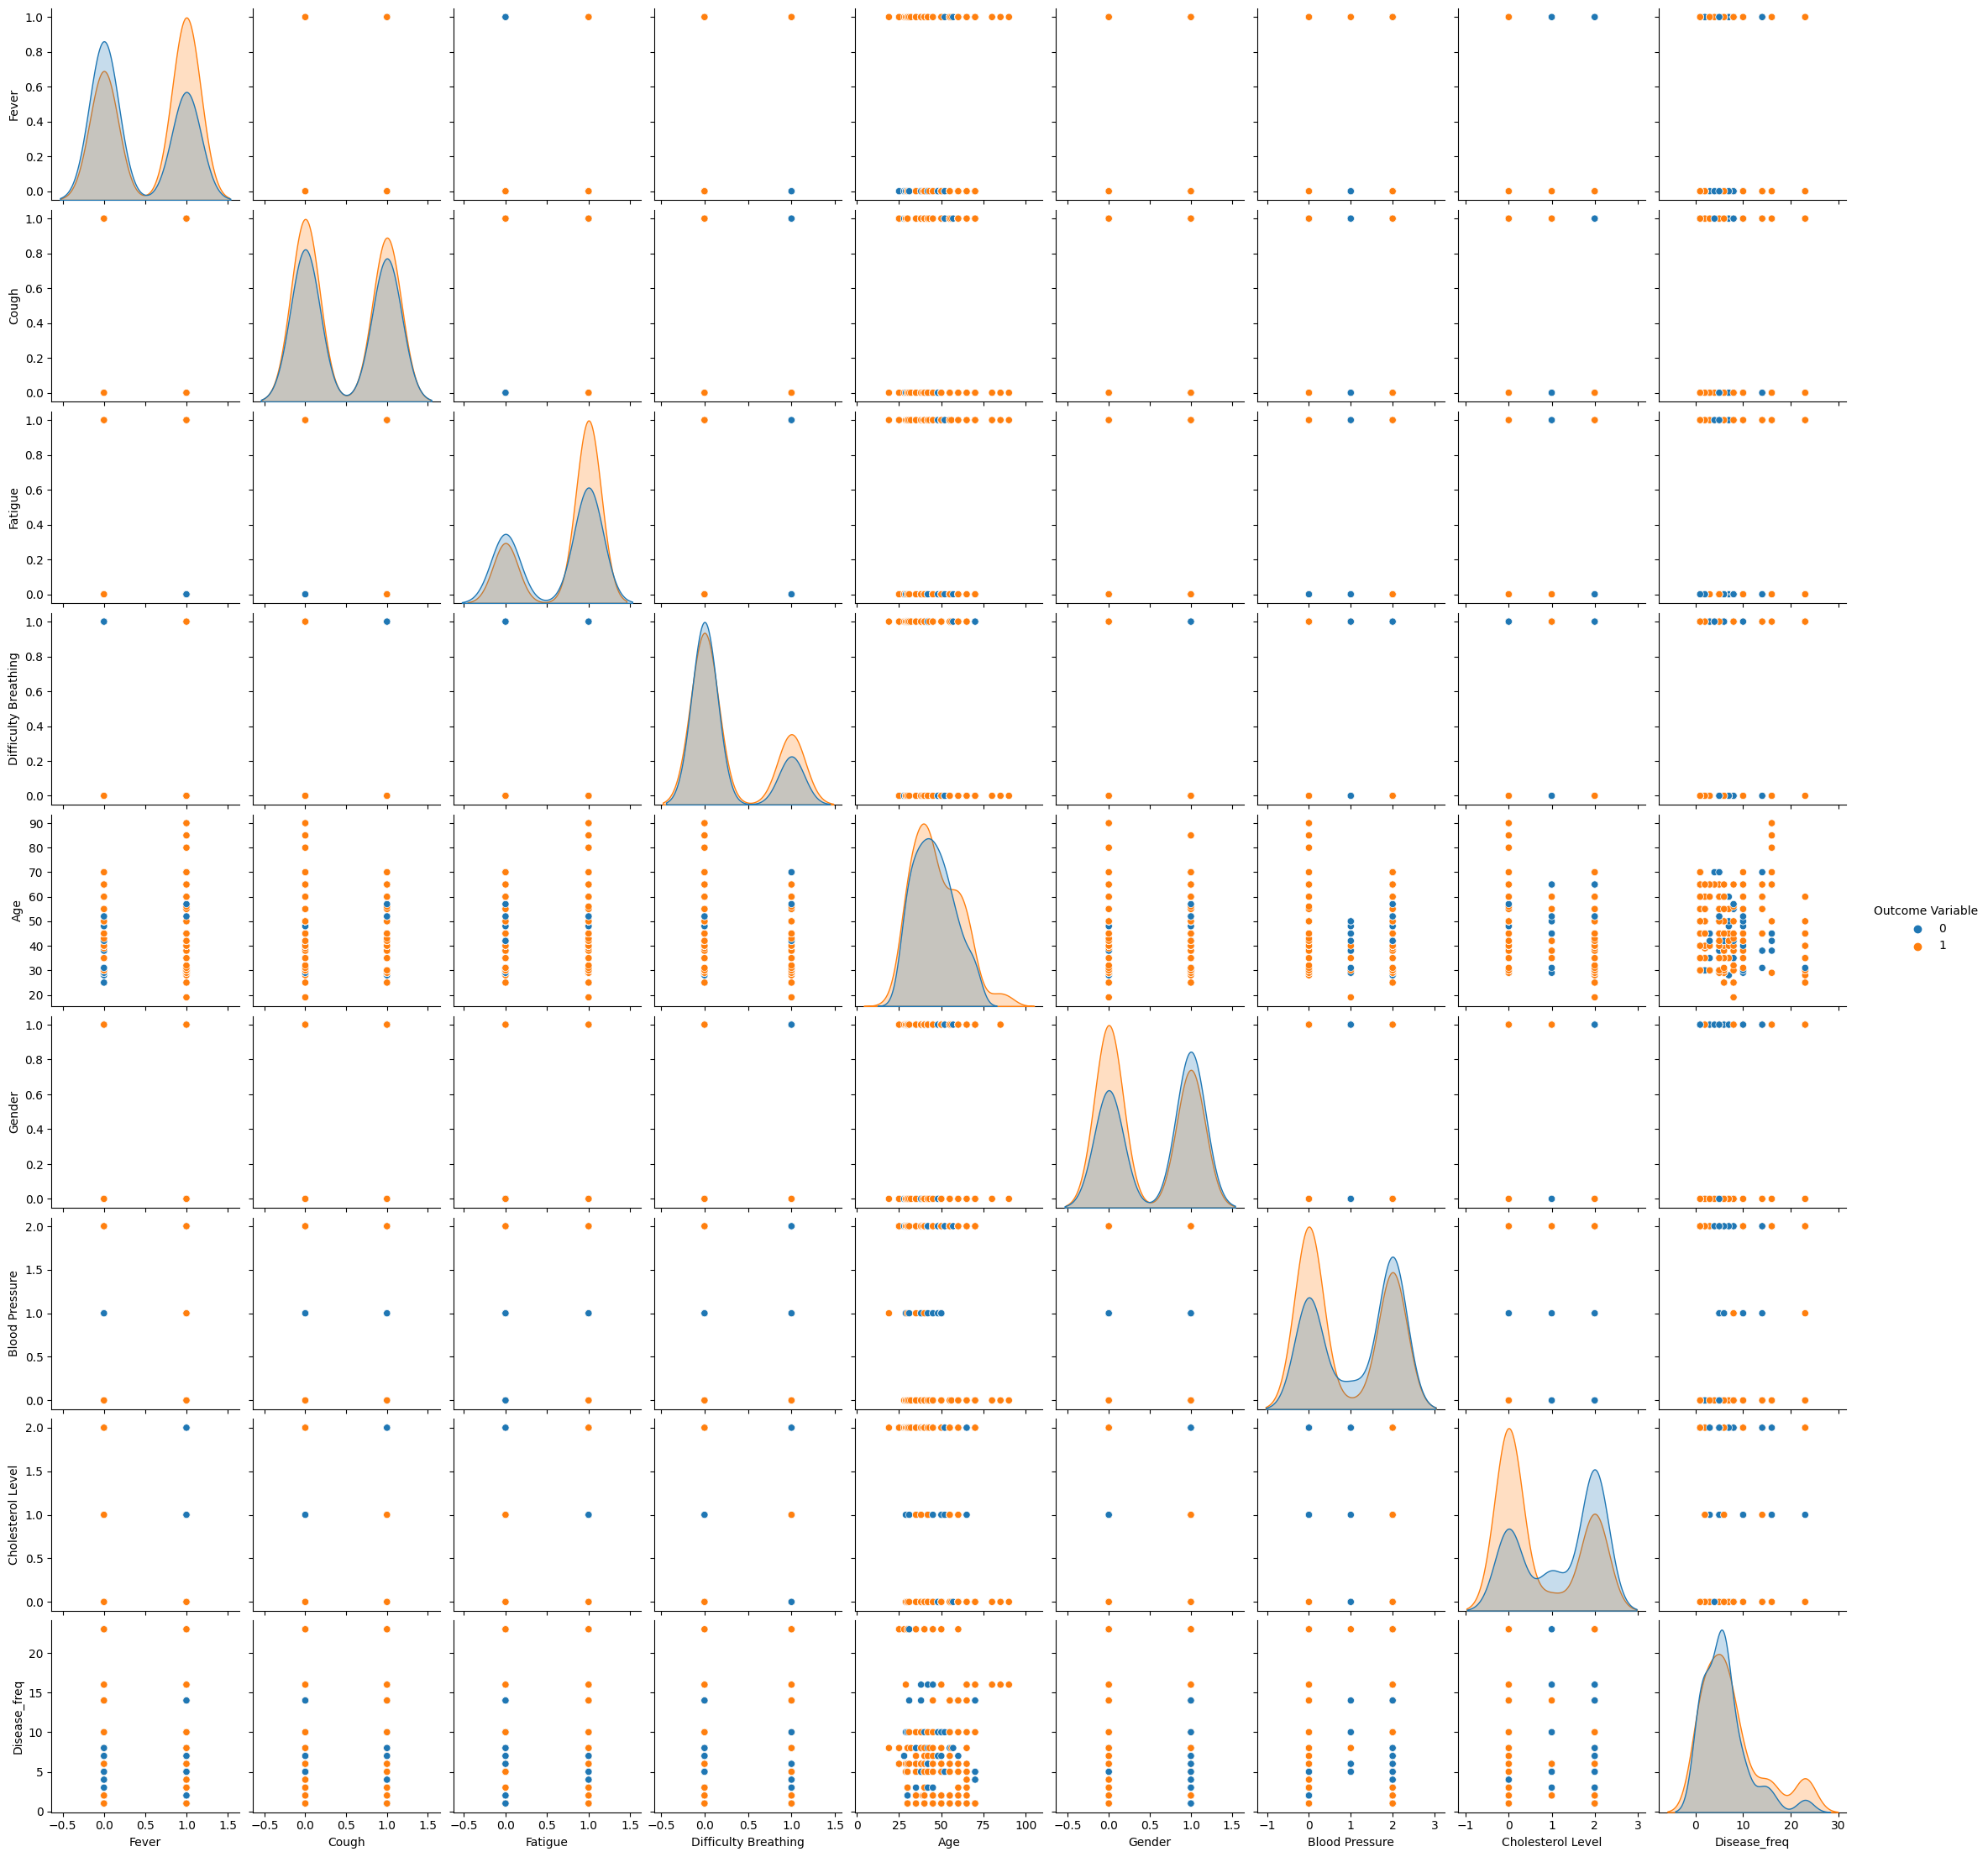

In [35]:
sns.pairplot(df,hue='Outcome Variable')
plt.show()

### 5.4 Gender Vs Outcome

Text(0.5, 1.0, 'Gender vs Outcome Variable')

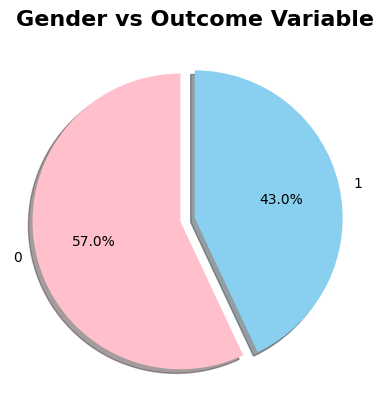

In [36]:
charges_by_Gender = df.groupby('Gender')['Outcome Variable'].sum()
explode = [0.1, 0]
colors = ['pink', '#89cff0']
plt.pie(charges_by_Gender, labels=charges_by_Gender.index, autopct='%1.1f%%',colors=colors,explode=explode, shadow=True, startangle=90)
plt.title('Gender vs Outcome Variable',fontsize=16, fontweight='bold')


### 5.5 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

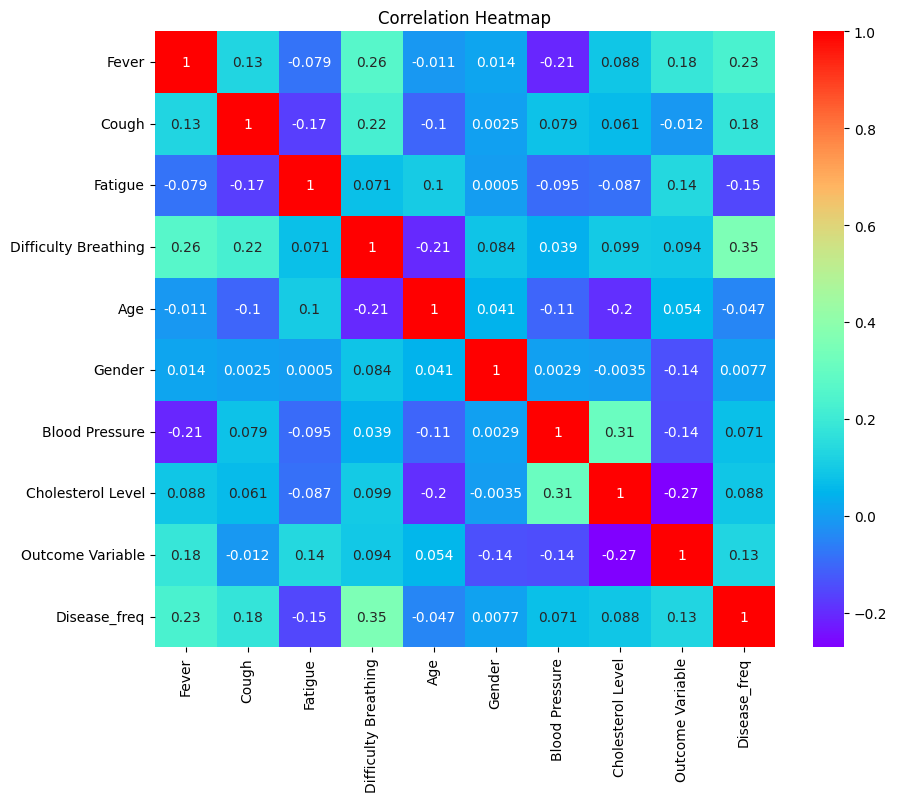

In [37]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')

# 6. Classification Model

Let's assume the name of disease irrelevant for this case study to see if general disease diagnosis along with classification algorithms can help to detect diseases


In [14]:
#dropping name column
df = df.iloc[:,1:]

In [15]:
df.tail()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_freq
344,1,0,1,0,80,0,0,0,1,16
345,1,0,1,0,85,1,0,0,1,16
346,1,0,1,0,85,1,0,0,1,16
347,1,0,1,0,90,0,0,0,1,16
348,1,0,1,0,90,0,0,0,1,16


In [16]:
df.columns

Index(['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable',
       'Disease_freq'],
      dtype='object')

### 6.1 Preparing X and y using pandas

In [17]:
features=['Fever','Cough','Fatigue','Difficulty Breathing','Age','Gender','Blood Pressure','Cholesterol Level','Disease_freq']
target=['Outcome Variable']


In [18]:
X=df[features]
y=df[target]

### 6.2 Splitting X and y into training and test dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
                                                

In [21]:
X_train.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease_freq
228,1,1,1,1,50,1,2,2,2
78,0,1,0,0,35,0,0,0,1
90,0,0,1,0,35,1,2,0,5
16,1,0,0,0,29,0,0,2,5
66,1,1,1,0,35,0,2,2,7


In [22]:
print('Train cases as below')
print('X_train_shape: ',X_train.shape)
print('y_train_shape: ',y_train.shape)
print('\n Test cases as below')
print('X_test_shape: ',X_test.shape)
print('y_test_shape: ', y_test.shape)

Train cases as below
X_train_shape:  (279, 9)
y_train_shape:  (279, 1)

 Test cases as below
X_test_shape:  (70, 9)
y_test_shape:  (70, 1)


# 7.Logistic regression in scikit-learn

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [47]:
y_pred_train = logreg.predict(X_train)

In [48]:
y_pred_train

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [49]:
logreg.predict_proba(X_train)

array([[0.67853932, 0.32146068],
       [0.47453458, 0.52546542],
       [0.48188319, 0.51811681],
       [0.5437737 , 0.4562263 ],
       [0.48440676, 0.51559324],
       [0.32557289, 0.67442711],
       [0.41602431, 0.58397569],
       [0.62673571, 0.37326429],
       [0.38155331, 0.61844669],
       [0.59996082, 0.40003918],
       [0.72232689, 0.27767311],
       [0.1569083 , 0.8430917 ],
       [0.38777669, 0.61222331],
       [0.57613769, 0.42386231],
       [0.2213189 , 0.7786811 ],
       [0.80749129, 0.19250871],
       [0.20066622, 0.79933378],
       [0.26034632, 0.73965368],
       [0.64854208, 0.35145792],
       [0.37781302, 0.62218698],
       [0.20401782, 0.79598218],
       [0.22330031, 0.77669969],
       [0.51975726, 0.48024274],
       [0.45430782, 0.54569218],
       [0.17256976, 0.82743024],
       [0.50965925, 0.49034075],
       [0.24199164, 0.75800836],
       [0.67883053, 0.32116947],
       [0.20066622, 0.79933378],
       [0.24058726, 0.75941274],
       [0.

### 7.1 Using the model for Predicition

In [50]:
y_pred_test = logreg.predict(X_test)

In [51]:
y_pred_test

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [63]:
probabilities = logreg.predict_proba(X_test)

In [64]:
probablilties_0 = probabilities[:,0] # 1st column
probablilties_1 = probabilities[:,1] # 2nd column

In [65]:
probablilties_1

array([0.84942444, 0.81383427, 0.8867535 , 0.47599342, 0.40897199,
       0.55094661, 0.18500278, 0.32146068, 0.35999173, 0.83962651,
       0.32624743, 0.77378861, 0.39117881, 0.83381943, 0.283517  ,
       0.7638626 , 0.56565133, 0.6833326 , 0.82012455, 0.27782379,
       0.47599342, 0.39691225, 0.32266576, 0.75611331, 0.71206247,
       0.70655745, 0.65464251, 0.20480467, 0.35487458, 0.83982841,
       0.57419809, 0.70169854, 0.53514264, 0.36755552, 0.64983814,
       0.56465461, 0.68509795, 0.56304248, 0.88213152, 0.54892436,
       0.1912418 , 0.7783038 , 0.41555587, 0.39020102, 0.73965368,
       0.35721447, 0.69969042, 0.35350614, 0.60944067, 0.47972765,
       0.35878669, 0.32984949, 0.56714429, 0.70383971, 0.17269026,
       0.26428988, 0.58198933, 0.53021206, 0.60944067, 0.24679882,
       0.25859247, 0.33300638, 0.12712507, 0.35878669, 0.32624743,
       0.59503714, 0.32266576, 0.37458449, 0.35114243, 0.88146106])

### 7.2 Model Evaluation using accuracy classification score

In [53]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is : ',accuracy_score(y_test,y_pred_test))

Accuracy score for test data is :  0.5142857142857142


### 7.3 Model Evaluation using confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
print(conf_matrix)

[[15 15]
 [19 21]]


In [55]:
c_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
print(c_matrix)

    0   1
0  15  15
1  19  21


In [56]:
test_predictions = X_test.copy()

In [57]:
test_predictions.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease_freq
157,1,1,1,0,42,0,0,0,7
341,1,1,1,0,70,0,0,0,1
315,1,0,1,1,65,0,0,0,4
234,1,0,0,0,50,1,2,0,2
155,1,1,1,0,42,1,0,2,10


In [66]:
test_predictions['Actual'] = y_test
test_predictions['Predicted']= y_pred_test
test_predictions['Probability_1']= probablilties_1

In [67]:
test_predictions.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease_freq,Actual,Predicted,Probability_1
157,1,1,1,0,42,0,0,0,7,1,1,0.849424
341,1,1,1,0,70,0,0,0,1,1,1,0.813834
315,1,0,1,1,65,0,0,0,4,1,1,0.886753
234,1,0,0,0,50,1,2,0,2,1,0,0.475993
155,1,1,1,0,42,1,0,2,10,1,0,0.408972


In [81]:
test_predictions['new_predictions_0.45']=0

In [88]:
test_predictions.loc[test_predictions['Probability_1']>0.45 , 'new_predictions_0.45']=1

In [89]:
test_predictions.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease_freq,Actual,Predicted,Probability_1,new_predictions_0.6,new_predictions_0.7,new_predictions_0.45
157,1,1,1,0,42,0,0,0,7,1,1,0.849424,1,1,1
341,1,1,1,0,70,0,0,0,1,1,1,0.813834,1,1,1
315,1,0,1,1,65,0,0,0,4,1,1,0.886753,1,1,1
234,1,0,0,0,50,1,2,0,2,1,0,0.475993,0,0,1
155,1,1,1,0,42,1,0,2,10,1,0,0.408972,0,0,1


In [60]:
c_matrix.index=['Actual Positive','Actual Negative']
c_matrix.columns = ['Predicted Positive','Predicted Negative']
print(c_matrix)

                 Predicted Positive  Predicted Negative
Actual Positive                  15                  15
Actual Negative                  19                  21


In [71]:
conf_matrix_6 = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print(conf_matrix_6)

    0    1
0  79   54
1  45  101


In [73]:
conf_matrix_6.index=['Actual Positive','Actual Negative']
conf_matrix_6.columns = ['Predicted Positive','Predicted Negative']
print(conf_matrix_6)

                 Predicted Positive  Predicted Negative
Actual Positive                  79                  54
Actual Negative                  45                 101


In [79]:
conf_matrix_7 = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print(conf_matrix_7)

    0    1
0  79   54
1  45  101


In [80]:
conf_matrix_7.index=['Actual Positive','Actual Negative']
conf_matrix_7.columns = ['Predicted Positive','Predicted Negative']
print(conf_matrix_7)

                 Predicted Positive  Predicted Negative
Actual Positive                  79                  54
Actual Negative                  45                 101


In [90]:
conf_matrix_45 = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print(conf_matrix_45)

    0    1
0  79   54
1  45  101


In [91]:
conf_matrix_45.index=['Actual Positive','Actual Negative']
conf_matrix_45.columns = ['Predicted Positive','Predicted Negative']
print(conf_matrix_45)

                 Predicted Positive  Predicted Negative
Actual Positive                  79                  54
Actual Negative                  45                 101


In [92]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred_test))
print(recall_score(y_test,y_pred_test))


0.5833333333333334
0.525


# 8. Decision Trees


In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion='gini') #entrophy
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4439006024096386, 0.96875, 'X[7] <= 0.5\ngini = 0.499\nsamples = 279\nvalue = [133, 146]'),
 Text(0.1844879518072289, 0.90625, 'X[2] <= 0.5\ngini = 0.426\nsamples = 133\nvalue = [41, 92]'),
 Text(0.10843373493975904, 0.84375, 'X[8] <= 5.5\ngini = 0.5\nsamples = 38\nvalue = [19, 19]'),
 Text(0.060240963855421686, 0.78125, 'X[4] <= 47.5\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.024096385542168676, 0.71875, 'X[4] <= 42.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.012048192771084338, 0.65625, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.03614457831325301, 0.65625, 'X[6] <= 1.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.024096385542168676, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.04819277108433735, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0963855421686747, 0.71875, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.08433734939759036, 0.65625, 'X[4] <= 52.5\ngini = 0.375\nsamples = 4\n

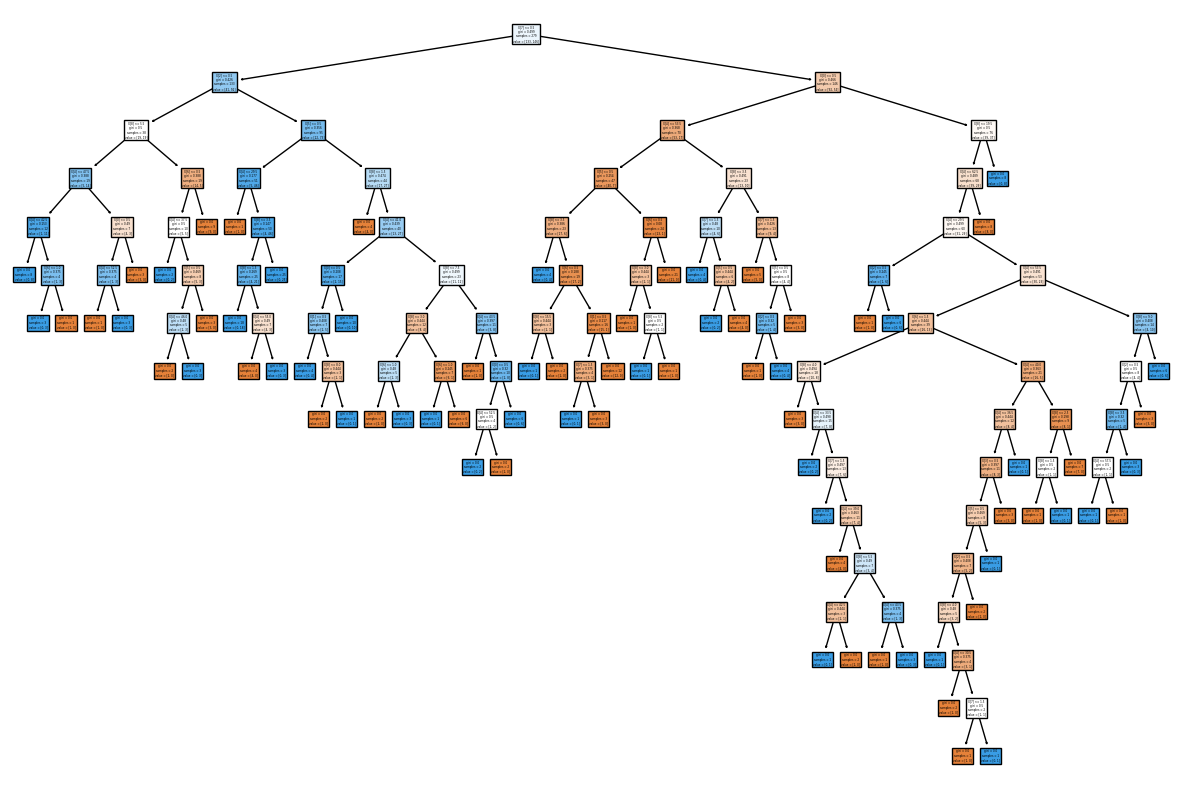

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

### 8.1 Using the Model for Prediction

In [24]:
y_pred_train1 = model.predict(X_train)

In [25]:
y_pred_test1 = model.predict(X_test)    

### 8.2 Model evaluation using Accuracy classification score

In [97]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.7857142857142857


In [98]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train1))


Accuracy score for train data is: 1.0


In [99]:
from sklearn.metrics import precision_score
print('Precision score for test data is:', precision_score(y_test,y_pred_test1))

Precision score for test data is: 0.8571428571428571


In [100]:
from sklearn.metrics import precision_score
print('Precision score for train data is:', precision_score(y_train,y_pred_train1))

Precision score for train data is: 1.0


In [101]:
from sklearn.metrics import recall_score
print('Recall score for train data is:', recall_score(y_train,y_pred_train1))


Recall score for train data is: 1.0


In [102]:
from sklearn.metrics import recall_score
print('Recall score for test data is:', recall_score(y_test,y_pred_test1))

Recall score for test data is: 0.75


### 8.3 Model Evaluation using confusion matrix

In [103]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Positive','Actual Negative']
confusion_matrix.columns = ['Predicted Positive','Predicted Negative']
print(confusion_matrix)

                 Predicted Positive  Predicted Negative
Actual Positive                  25                   5
Actual Negative                  10                  30


### 8.4 Decision Tree with Gridsearch

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(3,40),
                             'max_features': [4, 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(3, 40),
                          'max_features': [4, 'log2', None]}],
             refit='AUC')

In [105]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features=4, random_state=0)

In [107]:
y_pred_test2 = grid_search.predict(X_test)

### 8.5 Model evaluation using Accuracy classification score

In [108]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test2))

Accuracy score for test data is: 0.8142857142857143


In [111]:
from sklearn.metrics import recall_score
print('Recall score for test data is:', recall_score(y_test,y_pred_test2))

Recall score for test data is: 0.8


In [112]:
from sklearn.metrics import precision_score
print('Precision score for test data is:', precision_score(y_test,y_pred_test2))

Precision score for test data is: 0.8648648648648649


### 8.6 Model Evaluation using confusion matrix

In [113]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test2))

confusion_matrix.index = ['Actual Positive','Actual Negative']
confusion_matrix.columns = ['Predicted Positive','Predicted Negative']
print(confusion_matrix)

                 Predicted Positive  Predicted Negative
Actual Positive                  25                   5
Actual Negative                   8                  32


# 9. Random Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

### 9.1 Using The model for Predicition

In [24]:
y_pred_train_rf = model_rf.predict(X_train) 
y_pred_test_rf = model_rf.predict(X_test) 

### 9.2 Model Evaluation using accuracy classification score

In [25]:
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
print('Accuracy score for train data for DT is:', accuracy_train_rf)

Accuracy score for train data for DT is: 1.0


In [26]:
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print('Accuracy score for test data for DT is:', accuracy_test_rf)

Accuracy score for test data for DT is: 0.8714285714285714


In [27]:
from sklearn.metrics import recall_score
print('Recall score for test data is:', recall_score(y_train,y_pred_train_rf))
print('Recall score for test data is:', recall_score(y_test,y_pred_test_rf))

Recall score for test data is: 1.0
Recall score for test data is: 0.875


In [28]:
from sklearn.metrics import precision_score
print('Precision score for test data is:', precision_score(y_train,y_pred_train_rf))
print('Precision score for test data is:', precision_score(y_test,y_pred_test_rf))

Precision score for test data is: 1.0
Precision score for test data is: 0.8974358974358975


### 9.3 Model Evaluation using confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
c_matrix_test_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))
c_matrix_test_rf.index = ['Actual Positive','Actual Negative']
c_matrix_test_rf.columns = ['Predicted Positive','Predicted Negative']
print("Confusion Mateix for DT for test set\n",c_matrix_test_rf)

Confusion Mateix for DT for test set
                  Predicted Positive  Predicted Negative
Actual Positive                  26                   4
Actual Negative                   5                  35


### 9.4 ROC AUC Curve

In [30]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,y_pred_test_rf)
roc_auc_rf=auc(false_positive_rate, true_positive_rate)
roc_auc_rf

0.8708333333333333

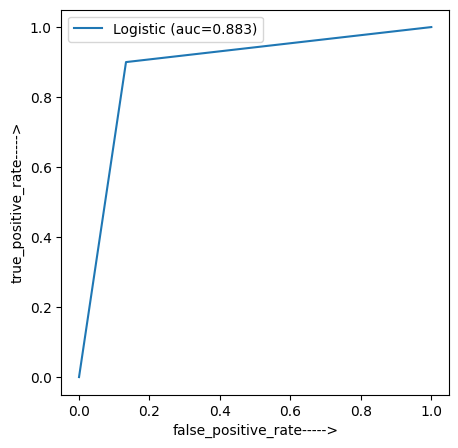

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5),dpi=100)
plt.plot(false_positive_rate, true_positive_rate,label='Logistic (auc=%0.3f)' % roc_auc_rf)
plt.xlabel('false_positive_rate----->')
plt.ylabel('true_positive_rate----->')
plt.legend()
plt.show()

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

AttributeError: 'Line2D' object has no property 'lable'

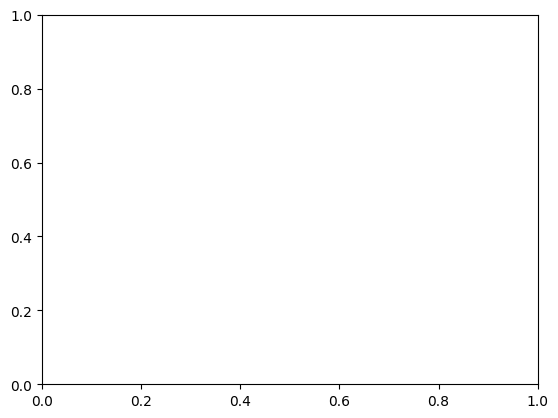

In [34]:
n_estimators=[1,2,4,8,16,32,64,100,120]
train_results=[]
test_results=[]
for estimator in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    model_rf.fit(X_train, y_train)
    train_pred = model_rf.predict(X_train)
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_train,train_pred)
    roc_auc_rf=auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc_rf)
    y_pred_test_rf = model_rf.predict(X_test) 
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,y_pred_test_rf)
    roc_auc_rf=auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc_rf)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results,"b",lable="Train AUC")
line2, = plt.plot(n_estimators,test_results,"c",lable="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylable("AUC score")
plt.xlable("n_estimators")
plt.show()

    
    

### 9.5 Hyper parameter for RF tuning using RANDOM SEARCH

In [31]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,8),
              "min_samples_split": range(5, 12),
              "min_samples_leaf": range(1, 4),
              "bootstrap": [True,False],
              "n_estimators": [20,60,100,120],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',4]
             }
# run randomized search
n_iter_search = 50
model_rf_tuned = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,cv=5,verbose=2,
                                   n_jobs = -1)
model_rf_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 8),
                                        'max_features': ['sqrt', 'log2', 4],
                                        'min_samples_leaf': range(1, 4),
                                        'min_samples_split': range(5, 12),
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [37]:
model_rf_tuned.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'gini',
 'bootstrap': False}

In [38]:
model_rf_tuned.best_score_

0.7957792207792208

### 9.6 Model evaluation using Accuracy classification score

In [32]:
y_pred_test_rf_tuned = model_rf_tuned.predict(X_test)
y_pred_train_rf_tuned = model_rf_tuned.predict(X_train)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_train_rf_tuned = accuracy_score(y_train,y_pred_train_rf_tuned)
accuracy_test_rf_tuned = accuracy_score(y_test,y_pred_test_rf_tuned)
print('Accuracy score for train data is:', accuracy_train_rf_tuned)
print('Accuracy score for test data is:', accuracy_test_rf_tuned)

Accuracy score for train data is: 0.9068100358422939
Accuracy score for test data is: 0.7714285714285715


In [34]:
from sklearn.metrics import recall_score
recall_score_train_rf_tuned = recall_score(y_train,y_pred_train_rf_tuned)
recall_score_test_rf_tuned = recall_score(y_test,y_pred_test_rf_tuned)
print('Recall score for test data is:', recall_score(y_train,y_pred_train_rf_tuned))
print('Recall score for test data is:', recall_score(y_test,y_pred_test_rf_tuned))

Recall score for test data is: 0.9178082191780822
Recall score for test data is: 0.75


In [35]:
from sklearn.metrics import precision_score
precision_score_train_rf_tuned = precision_score(y_train,y_pred_train_rf_tuned)
precision_score_test_rf_tuned = precision_score(y_test,y_pred_test_rf_tuned)
print('Precision score for test data is:', precision_score(y_train,y_pred_train_rf_tuned))
print('Precision score for test data is:', precision_score(y_test,y_pred_test_rf_tuned))

Precision score for test data is: 0.9054054054054054
Precision score for test data is: 0.8333333333333334


### 9.7 Model Evaluation using Confusion matrix

In [36]:
#from sklearn.metrics import confusion_matrix

c_matrix_train_rf_tuned = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf_tuned))

c_matrix_train_rf_tuned.index = ['Actual Positive','Actual Negative']
c_matrix_train_rf_tuned.columns = ['Predicted Positive','Predicted Negative']
print(c_matrix_train_rf_tuned)

                 Predicted Positive  Predicted Negative
Actual Positive                 119                  14
Actual Negative                  12                 134


In [37]:
from sklearn.metrics import confusion_matrix

c_matrix_test_rf_tuned = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf_tuned))

c_matrix_test_rf_tuned.index = ['Actual Positive','Actual Negative']
c_matrix_test_rf_tuned.columns = ['Predicted Positive','Predicted Negative']
print(c_matrix_test_rf_tuned)

                 Predicted Positive  Predicted Negative
Actual Positive                  24                   6
Actual Negative                  10                  30


# 10. Conclusion

### Here's the Results of different classification models



### Logestic Regression:
- __Accuracy Score__ is 0.514<br>
- __Recall Score__ is 0.583<br>
- __Precision Score__ is 0.525<br>
- __confusion Matrix__ 79+101=180 correct prediction and 45+54=99 False prediction<br>

### Decision Tree:
- __Accuracy Score__ is 0.78<br>
- __Recall Score__ is 1.0<br>
- __Precision Score__ is 0.857<br>
- __confusion Matrix__ 25+30=55 correct prediction and 10+5=15 False prediction<br>
### Grid Search:
- __Accuracy Score__ is 0.814<br>
- __Recall Score__ is 0.864<br>
- __Precision Score__ is 0.8<br>
- __confusion Matrix__ 25+32=57 correct prediction and 8+5=13 False prediction<br>

### Random Forest:
- __Accuracy Score__ is 0.857<br>
- __Recall Score__ is 0.85<br>
- __Precision Score__ is 0.894<br>
- __confusion Matrix__ 26+34=60 correct prediction and 6+4=10 False prediction<br>
- __ROC value__ is 0.833<br>
### Randomizes Search:
- __Accuracy Score__ is 0.96<br>
- __Recall Score__ is 0.917<br>
- __Precision Score__ is 0.905<br>
- __confusion Matrix__ 24+30=54 correct prediction and 10+6=16 False prediction<br>